## **Data Science and Analysis**: Predicting Weather based on Music Listening Patterns
### Report by: Gabriel DiMartino for CPSC 222 Intro to Data Science
### Introduction:
For this project, Spotify Listening data and Weather data for Alexandria VA. I am researching this domain, because I am interested in the applications my Spotify. If a correlation between Spotify and the Weather exists, other factors such as mental health might be predictable. The data format for this project consisted of a mix between CSV and JSON. Because of the poor quality of Spotify data, The SpotiPY API was used to add additional information such as danceability and energy for each song. The result was a CSV containing critical data for each song. The tables included in these datasets are: **Alexandria Weather** and **Spotify API Data**.

As mentioned earlier, the data for **Spotify** was collected both from Spotify Listening and the Spotify Python API. Similarly, the **Alexandria Weather** was collected from sources such as the National Weather Service. Combined, the tables make up 1900 instances for the months of **June - August**, with the weather data being repeated to match the several instances of music.

The relevant instances of the Spotify Data include:
- **Date:** Attribute to merge both datasets
- **Dancebility:** Attribute bound between 0 and 1
- **Energy:** Attribute bound between 0 and 1
- **Loudness:** Attribute bound between 0 and -20
- **Speechness:** Attribute bound between 0 and 1
- **Acousticness:** Attribute bound between 0 and 1
- **Instrumentalness:** Attribute bound between 0 and 1
- **Liveness:** Attribute bound between 0 and 1
- **Valence:** Attribute bound between 0 and 1
- **Tempo:** Attribute determined by the beats per second.

The relevant instances of the Weather Data include:
- **Date:** Attribute to merge both datasets
- **Conditions:** 5 classifications for the type of weather

From this data, I am attempting to classify the type of weather, based on my music history. The potential impact of this analysis is the use of my Spotify data to classify other meaningful attributes such as mental health or current activity. If this methodology can be generalized, potential stakeholders and benefactors from this research include psychologists and psychiatrists who could use similar methods to determine depression or bi-polar states.

In [111]:
import pandas as pd
dataset_spotify = pd.read_csv('apiData.csv', header=0)
dataset_weather_alexandria = pd.read_csv('alexandria.csv', header=0)
dataset_weather = dataset_weather_alexandria[['date', 'conditions']]

### Data Analysis:
Using CSV files `apiData.csv` and `alexandria.csv`, a Pandas Dataframe is created to manipulate the data inside the Jupyter notebook. Because the only relevant data from the Alexandria Weather is the Date (Which is used as the merge key), and Conditions (which outline the classification of each instance), all other attributes are dropped initially. Finally, the datasets are merged from inner and displayed below.

In [112]:
merged_dataset = dataset_spotify.merge(dataset_weather, on='date',)
display(merged_dataset)

,Year,Month,Day,time,trackName,albumName,artistName,playlists.name,track_id,date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,conditions
0,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,Partially cloudy
1,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,"Rain, Overcast"
2,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,Partially cloudy
3,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,"Rain, Overcast"
4,2023,6,22,10:09:00,Do I Wanna Know?,AM,Arctic Monkeys,Me and michael,5FVd6KXrgO9B3JPmC8OPst,6/22/2023,...,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2023,6,19,17:29:00,Welcome to the Black Parade,The Black Parade,My Chemical Romance,Missing Her,5wQnmLuC1W7ATsArWACrgW,6/19/2023,...,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4,"Rain, Partially cloudy"
1990,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,Clear
1991,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,Partially cloudy
1992,2023,7,30,05:30:00,Les pensées,Foundations,The Architect,Missing Her,0fira69E5qwYJNSvzEOCs7,7/30/2023,...,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4,Clear


#### Data Cleaning
Because the classification data for the weather is qualitative and not quantitive (Meaning they classification uses strings not integers), 2 functions were created to fill in this missing data. The First `enumerate_conditions(conditions)` takes the attribute of conditions from the dataset and steps through each instance and enumerates them, returning a new attribute `ConditionsEnum`. The second function is `binary_precepetation(value)` which takes in the already enumerated data, and sorts it into binary values 1 and 0 to represent **Rain vs No Rain**.

In [113]:
def enumerate_conditions(conditions):
   condition_mapping = {condition: index for index, condition in enumerate(set(conditions))}
   enumerated_data = [condition_mapping[condition] for condition in conditions]
   return enumerated_data

In [114]:
def binary_precipitation(value):
    if value != 1 and value != 3:
        return 1
    else:
        return 0

Finally, after defining these helper functions, they are applied to the dataset and new attributes are created within the dataframe. This cleaning was necessary, as classification techniques require integer inputs to produce valid outputs. Similarly, a look up table was created for an easy reference to the String to Enum Conversion. This will be usefull when visualizing the data to provide Human Readable language instead of integer values.

In [115]:
merged_dataset['conditionsEnum'] = enumerate_conditions(merged_dataset['conditions'])
merged_dataset['conditionsBinary'] = merged_dataset['conditionsEnum'].apply(binary_precipitation)
display(merged_dataset[['conditions','conditionsEnum','conditionsBinary']])

,conditions,conditionsEnum,conditionsBinary
0,Partially cloudy,2,1
1,"Rain, Overcast",3,0
2,Partially cloudy,2,1
3,"Rain, Overcast",3,0
4,Partially cloudy,2,1
...,...,...,...
1989,"Rain, Partially cloudy",1,0
1990,Clear,0,1
1991,Partially cloudy,2,1
1992,Clear,0,1


In [116]:
unique_conditions_key = merged_dataset[['conditions', 'conditionsEnum']].drop_duplicates()
unique_conditions_key = unique_conditions_key.sort_values(by='conditionsEnum')
display(unique_conditions_key)

,conditions,conditionsEnum
8,Clear,0
9,"Rain, Partially cloudy",1
0,Partially cloudy,2
1,"Rain, Overcast",3
1330,Overcast,4


#### Data Visualization

Utilizing the enumerated data, 4 graphs were constructed using MatplotLib to display 4 key elements of a song Energy, Temp, Danceability, and Loudness. These values were compared to the weather to try and see any relationship between a song and the current weather.

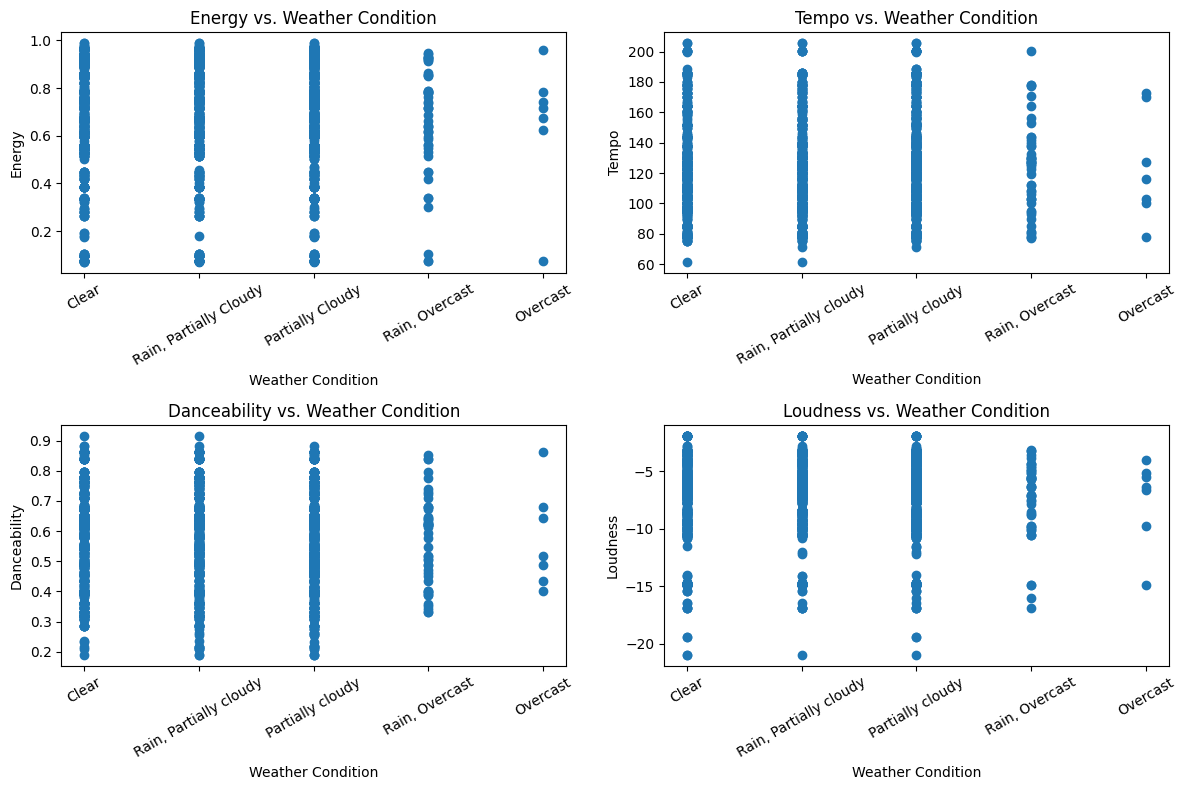

In [117]:
import matplotlib.pyplot as plt

energy_dataset = merged_dataset['energy']
tempo_dataset = merged_dataset['tempo']
danceability_dataset = merged_dataset['danceability']
loudness_dataset = merged_dataset['loudness']
enumerated_conditions_dataset = merged_dataset['conditionsEnum']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(enumerated_conditions_dataset, energy_dataset, marker='o', linestyle='-')
axes[0, 0].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[0, 0].set_xticklabels(['Clear','Rain, Partially Cloudy','Partially Cloudy','Rain, Overcast','Overcast'])
axes[0, 0].set_title('Energy vs. Weather Condition')
axes[0, 0].set_xlabel('Weather Condition')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].tick_params(axis='x', rotation=30)

axes[0, 1].scatter(enumerated_conditions_dataset, tempo_dataset, marker='o', linestyle='-')
axes[0, 1].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[0, 1].set_xticklabels(unique_conditions_key['conditions'])
axes[0, 1].set_title('Tempo vs. Weather Condition')
axes[0, 1].set_xlabel('Weather Condition')
axes[0, 1].set_ylabel('Tempo')
axes[0, 1].tick_params(axis='x', rotation=30)

axes[1, 0].scatter(enumerated_conditions_dataset, danceability_dataset, marker='o', linestyle='-')
axes[1, 0].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[1, 0].set_xticklabels(unique_conditions_key['conditions'])
axes[1, 0].set_title('Danceability vs. Weather Condition')
axes[1, 0].set_xlabel('Weather Condition')
axes[1, 0].set_ylabel('Danceability')
axes[1, 0].tick_params(axis='x', rotation=30)

axes[1, 1].scatter(enumerated_conditions_dataset, loudness_dataset, marker='o', linestyle='-')
axes[1, 1].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[1, 1].set_xticklabels(unique_conditions_key['conditions'])
axes[1, 1].set_title('Loudness vs. Weather Condition')
axes[1, 1].set_xlabel('Weather Condition')
axes[1, 1].set_ylabel('Loudness')
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Reviewing the information provided by the 4 graphs, the data highlights an interesting trend where the range of Energy, Tempo, Danceability, and Loudness varies without any relationship to the weather condition. If there was a relationship, clustering would appear on the graphs, where energy for example would be higher on clear days and lower on overcast days. Due to this lack of relationship, classification attempts will most likely fail.

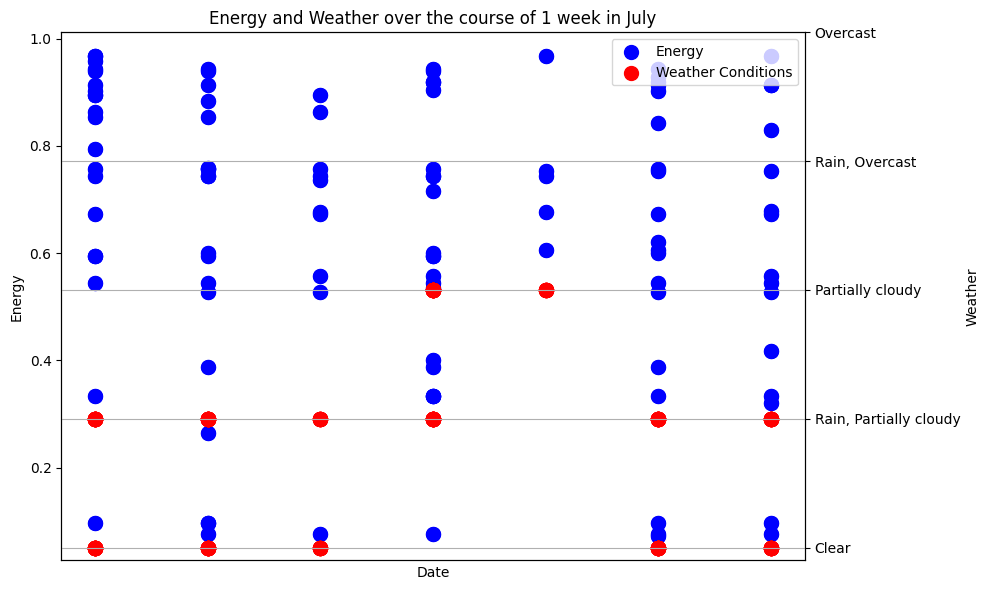

In [122]:
week_data = merged_dataset[(merged_dataset['Day'] <= 7) & (merged_dataset['Month'] == 7)]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(week_data['date'], week_data['energy'], marker='o', s=100, c='blue', label='Energy')
ax1.set_ylabel('Energy')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.scatter(week_data['date'], week_data['conditionsEnum'], marker='o', s=100, c='red', label='Weather Conditions')
ax2.set_ylabel('Weather')

custom_ticks = unique_conditions_key['conditionsEnum'].tolist()
custom_labels = unique_conditions_key['conditions'].tolist()
ax2.set_yticks(custom_ticks)
ax2.set_yticklabels(custom_labels)

# Add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Weather over the course of 1 week in July')
plt.tight_layout()
plt.show()


Taking a closer look at the energy vs weather conditions over the first week in July, the data from before is made clearer. As shown above, each song varies in energy for each day, and is independent of the weather. However, this new graph also highlights how each day can have more than one weather type. This is accurate to the weather in Virginia as it can vary from raining for 30 minutes intermitantly to a clear and sunny day. Due to this double classigication, will not impact the prediction model, as each song has only 1 classification for weather.

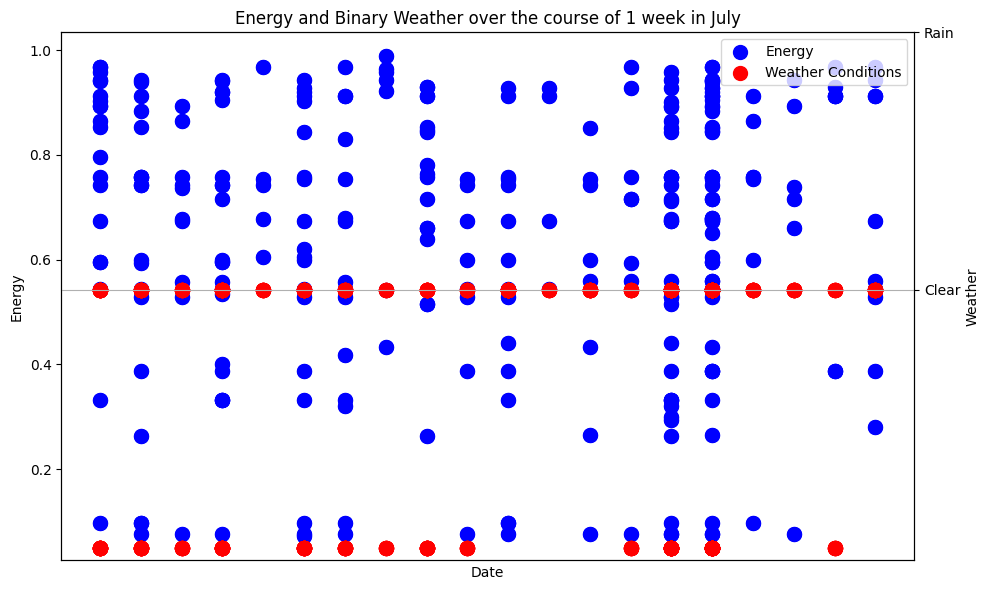

In [124]:
import matplotlib.pyplot as plt

week_data_binary = merged_dataset[(merged_dataset['Day'] <= 20) & (merged_dataset['Month'] == 7)]

fig, binary_ax1 = plt.subplots(figsize=(10, 6))

binary_ax1.scatter(week_data_binary['date'], week_data_binary['energy'], marker='o', s=100, c='blue', label='Energy')
binary_ax1.set_ylabel('Energy')
binary_ax1.set_xlabel('Date')

binary_ax2 = binary_ax1.twinx()

binary_ax2.scatter(week_data_binary['date'], week_data_binary['conditionsBinary'], marker='o', s=100, c='red', label='Weather Conditions')
binary_ax2.set_ylabel('Weather')

binary_ax2.set_yticks([1, 2])
binary_ax2.set_yticklabels(['Clear', 'Rain'])

# Add a legend for both lines
lines1, labels1 = binary_ax1.get_legend_handles_labels()
lines2, labels2 = binary_ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Binary Weather over the course of the first 20 days in July')
plt.tight_layout()
plt.show()


By removing the enumerated data and instead comparing the energy to a binary value, some clusters begin to form. On days where every instance was classified as raining, the energy levels on this day appear to cluster with higher energy. This suggests a stronger relationship between aspects such as energy with the Binary Weather Attribute. If so, a prediction model will be more accurate.

#### Preliminary Hypothesis: 
Analysing the data above, I hypothesize a less than 50% correlation with the enumerated data. However, when comparing the the binary data, a stronger correlation will present itself. While not perfect, low energy songs correlate to a sunny/clear day where a high tempo song correlates to a rainy/cloudy day.

### Classification

In [ ]:
columns_to_drop = ['Year', 'Month', 'Day', 'time', 'trackName', 'albumName', 'artistName',
                   'playlists.name', 'track_id', 'hour', 'date', 'conditions','conditionsEnum','conditionsBinary']

x = merged_dataset.drop(columns=columns_to_drop, axis=1)

x.fillna(0, inplace=True)
#x.to_csv('./cleaned_data/cleaned.csv', index=False)
y = merged_dataset['conditionsEnum']
z = merged_dataset['conditionsBinary']

display(x)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4
1,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4
2,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4
3,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4
4,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.217,0.905,2,-4.103,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4
1990,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4
1991,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4
1992,0.678,0.535,10,-8.592,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4


Seperate the merged dataset into a train and test data. X train remains the same, while the Y and Z are different values, one being the enumerated values of the weather while the second is the binary weather.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
a_train, a_test, b_train, b_test = train_test_split(x, z, test_size=0.2)

Create the training and test for both testing factors.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree1 = tree.fit(x_train, y_train)
y_pred = tree1.predict(x_test)
tree2 = tree.fit(a_train, b_train)
b_pred = tree2.predict(a_test)


Using a decision tree classifier, compare the training data to the predicted data. the y predict compares the enumerated data, while the b predict compares the binary data.

In [ ]:
from sklearn import metrics
print("Enumerated Accuracy:",metrics.accuracy_score(y_test, y_pred))

Enumerated Accuracy: 0.2731829573934837


A low accuracy for the enumerated data is understandable due to the quality of the song data. Because songs varied from medium to high energy on the same day, the model was unable to find a valid pattern. For a better accuracy, more precise weather data should be used. From this,  time as a key for a more accurate dataset.

In [ ]:
print("Binary Accuracy:",metrics.accuracy_score(b_test, b_pred))

Binary Accuracy: 0.6466165413533834


As predicted the binary accuracy was much higher than the enumerated data. However, a large part of this increase in accuracy is due to the binary prediction. By nature a decision between two values has a random 50% chance of success. Adding more data into the model increases the percentage by 11%.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

Using a nearest neighbor search, the Enumerated and Binary values are predicted and compared to the original data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train, y_train)
knn2.fit(a_train, b_train)
y_pred = knn1.predict(x_test)
b_pred = knn2.predict(a_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Enumerated Accuracy:", accuracy)

Enumerated Accuracy: 0.2832080200501253


In [ ]:
accuracy = metrics.accuracy_score(b_test, b_pred)
print("Binary Accuracy:", accuracy)

Binary Accuracy: 0.5914786967418546


An important note for this data is the volatility of weather in Alexandria. While weather is predicted to rain, often times it only rains for 5 - 30 minutes. Recounting personal experience, mostly every day was clear skies and sunny. Similarly, most of the day I was working and not listening to music. Most of the data above visualizes my 2+ hours on the metro commuting.